## Feature Selection
* Only keep the important features

In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from skimage import io

In [2]:
mypath = '/Users/yinzi/Downloads/crop_part1'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath +'/' + x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
df = pd.DataFrame(data = splitcolumns, columns = filecolumns)

In [3]:
images = []
for img_path in df['file']:
    img = io.imread(img_path)
    images.append(img)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, df['gender'], test_size=0.3, random_state=42)

In [5]:
from skimage import color
X_grays = []
for img in X_train:
    img_gray = color.rgb2gray(img)
    X_grays.append(img_gray)

In [6]:
X_flat = np.array(X_grays).reshape((6844, 200*200))
X_flat.shape

(6844, 40000)

## 1. Random Forest feature selection

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
X_flat_df = pd.DataFrame(X_flat)

In [8]:
X_flat_df.columns

RangeIndex(start=0, stop=40000, step=1)

In [9]:
# SelectFromModel will select those features which importance is greater than the mean importance of all the features by default
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100))
selector.fit(X_flat_df, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [10]:
# To see which features are important
selector.get_support()

array([ True,  True, False, ...,  True,  True,  True])

In [11]:
selected_feature= X_flat_df.columns[(selector.get_support())]
len(selected_feature)

12794

In [12]:
print(selected_feature[0:20])

Int64Index([0, 1, 7, 8, 12, 17, 21, 25, 28, 29, 32, 41, 42, 45, 49, 50, 54, 56,
            76, 78],
           dtype='int64')


In [76]:
importances = selector.estimator_.feature_importances_
importances[0:10]

array([4.42063359e-05, 4.99956831e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.09122234e-05, 8.65361394e-05,
       5.37943343e-05, 4.44354106e-06])

In [77]:
len(importances)

40000

Text(0.5, 1.0, 'Feature Selected')

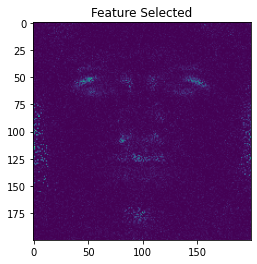

In [78]:
plt.imshow(importances.reshape(200, 200))
plt.title('Feature Selected')

In [79]:
type(importances)

numpy.ndarray

In [85]:
columns = X_flat_df.columns
columns[0:10]

RangeIndex(start=0, stop=10, step=1)

In [81]:
importances_reshape = importances.reshape(-1, 1)

In [84]:
importances_df = pd.DataFrame(importances_reshape, columns = columns)
importances_df(head)

ValueError: Shape of passed values is (40000, 1), indices imply (40000, 40000)

In [71]:
sorted_importances = sorted(importances, reverse=True)

In [72]:
sorted_importances[0:20]

[0.001269771345957394,
 0.0011317360507002593,
 0.0010554139023668425,
 0.0010088513662293245,
 0.0009770761294429031,
 0.0009040791971775501,
 0.0008347008464866736,
 0.0008161879036495814,
 0.0007824008925402377,
 0.0007736114913144728,
 0.0007602684393424481,
 0.0007548542263920533,
 0.0007351827132261704,
 0.0007345681444631102,
 0.0007325917473783853,
 0.0006743910146151468,
 0.0006740188253125872,
 0.0006660991663201894,
 0.0006635989496614267,
 0.0006611768103355116]

In [73]:
scaled_importances = []
for importance in importances:
    importance = importance*10000
    importance_round = round(importance, 2)
    scaled_importances.append(importance_round)

In [74]:
min(scaled_importances), max(scaled_importances)

(0.0, 12.7)

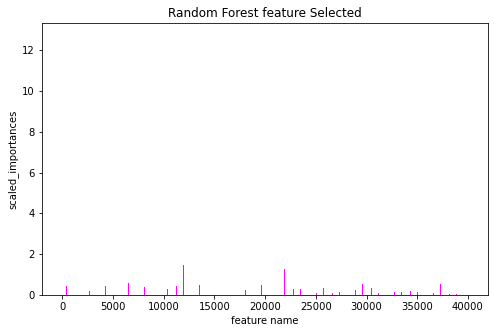

In [75]:
fig = plt.figure(figsize = (8, 5))
plt.bar(X_flat_df.columns, scaled_importances, color = 'magenta', width=0.1)
plt.xlabel("feature name")
plt.ylabel('scaled_importances')
plt.title("Random Forest feature Selected")
plt.show()

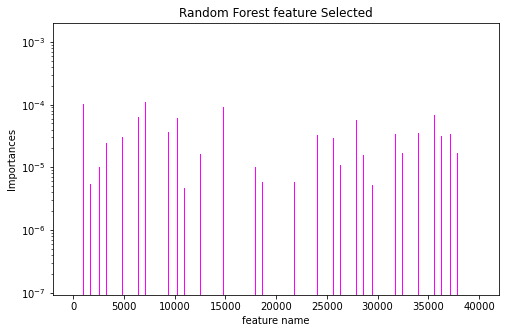

In [47]:
fig = plt.figure(figsize = (8, 5))
plt.bar(X_flat_df.columns, importances, color = 'magenta', width=0.1)
plt.xlabel("feature name")
plt.ylabel('Importances')
plt.title("Random Forest feature Selected")
plt.yscale('log')
plt.show()

In [14]:
selected_df = X_flat_df.loc[:, selected_feature]
selected_df.shape

(6844, 12794)